In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/butterfly-images40-species/training.csv.csv
/kaggle/input/butterfly-images40-species/butterflies and moths.csv
/kaggle/input/butterfly-images40-species/EfficientNetB0-100-(224 X 224)- 97.59.h5
/kaggle/input/butterfly-images40-species/valid/PIPEVINE SWALLOW/5.jpg
/kaggle/input/butterfly-images40-species/valid/PIPEVINE SWALLOW/1.jpg
/kaggle/input/butterfly-images40-species/valid/PIPEVINE SWALLOW/4.jpg
/kaggle/input/butterfly-images40-species/valid/PIPEVINE SWALLOW/3.jpg
/kaggle/input/butterfly-images40-species/valid/PIPEVINE SWALLOW/2.jpg
/kaggle/input/butterfly-images40-species/valid/ARCIGERA FLOWER MOTH/5.jpg
/kaggle/input/butterfly-images40-species/valid/ARCIGERA FLOWER MOTH/1.jpg
/kaggle/input/butterfly-images40-species/valid/ARCIGERA FLOWER MOTH/4.jpg
/kaggle/input/butterfly-images40-species/valid/ARCIGERA FLOWER MOTH/3.jpg
/kaggle/input/butterfly-images40-species/valid/ARCIGERA FLOWER MOTH/2.jpg
/kaggle/input/butterfly-images40-species/valid/SIXSPOT BURNET MOTH/5.jpg


In [4]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import os
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [5]:
train_dir='/kaggle/input/butterfly-images40-species/train'
validate_dir='/kaggle/input/butterfly-images40-species/valid'
test_dir='/kaggle/input/applai-cv-st23-assignment-3'

In [6]:
# Define the target image height and width for resizing
img_height, img_width = 224, 224

# Set the batch size for training and validation datasets
batch_size = 32

# Create a training dataset using the image_dataset_from_directory function
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=123,           # Seed for reproducibility
    shuffle=True,       # Shuffle the dataset during training
    image_size=(img_height, img_width),   # Resize images to specified dimensions
    batch_size=batch_size   # Divide data into batches of specified size
)

Found 12594 files belonging to 100 classes.


In [7]:
# Create a training dataset using the image_dataset_from_directory function
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    seed=123,           # Seed for reproducibility
    shuffle=False,       # Shuffle the dataset during training
    image_size=(img_height, img_width),   # Resize images to specified dimensions
    batch_size=batch_size   # Divide data into batches of specified size
)

Found 500 files belonging to 1 classes.


In [8]:
# Create a training dataset using the image_dataset_from_directory function
Validate_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    validate_dir,
    seed=123,           # Seed for reproducibility
    shuffle=True,       # Shuffle the dataset during training
    image_size=(img_height, img_width),   # Resize images to specified dimensions
    batch_size=batch_size   # Divide data into batches of specified size
)

Found 500 files belonging to 100 classes.


In [9]:
import pandas as pd
df = pd.read_csv('/kaggle/input/butterfly-images40-species/butterflies and moths.csv')
df.head()

,class id,filepaths,labels,data set
0,0,train/ADONIS/001.jpg,ADONIS,train
1,0,train/ADONIS/002.jpg,ADONIS,train
2,0,train/ADONIS/003.jpg,ADONIS,train
3,0,train/ADONIS/004.jpg,ADONIS,train
4,0,train/ADONIS/005.jpg,ADONIS,train


In [10]:
import tensorflow as tf
import numpy as np
import tensorflow.keras.layers as tfl
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
import os
from PIL import Image

In [11]:
def data_augmenter():
   
    data_augmentation = tf.keras.Sequential()
    data_augmentation.add(RandomFlip('horizontal'))
    data_augmentation.add(RandomRotation(0.2))
    
    return data_augmentation

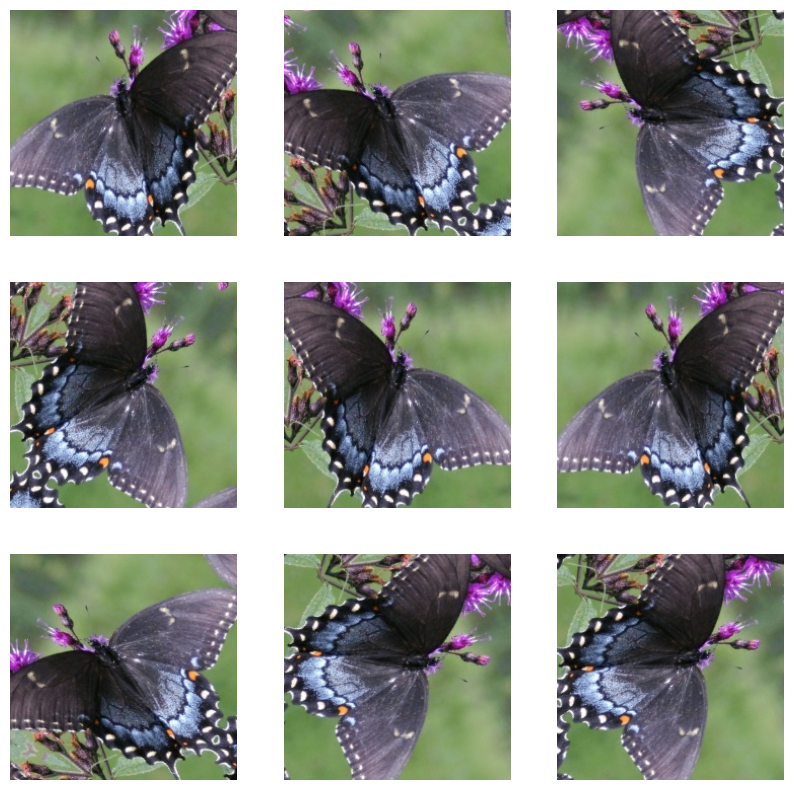

In [12]:
data_augmentation = data_augmenter()

for image, _ in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

In [29]:
"""#model1
import tensorflow as tf
from tensorflow import keras

inputs = tf.keras.Input(shape = (224, 224, 3))

x = data_augmentation(inputs)
x = tfl.GlobalAveragePooling2D()(x)
x = tfl.Dropout(rate = 0.2)(x)

outputs = tfl.Dense(units = 100, activation = 'softmax')(x) #We will use from logits = true for more accuracy

model_mnet = tf.keras.Model(inputs, outputs)
model_mnet.summary()"""

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 global_average_pooling2d_3   (None, 3)                0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_3 (Dropout)         (None, 3)                 0         
                                                                 
 dense_3 (Dense)             (None, 100)               400       
                                                                 
Total params: 400
Trainable params: 400
Non-trainable params: 0
_____________________________________________________________

In [30]:
#model1
#loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
#optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1*0.001) #Using a smaller learning rate

model_mnet.compile(loss = loss_function,
              optimizer = "adam",
              metrics = ['accuracy'])



In [31]:
history_mnet = model_mnet.fit(train_dataset,
                         epochs = 20,
                         validation_data = Validate_dataset)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


394/394 [==============================] - 25s 63ms/step - loss: 27.5944 - accuracy: 0.0108 - val_loss: 6.8694 - val_accuracy: 0.0180
Epoch 2/20
394/394 [==============================] - 24s 61ms/step - loss: 8.0133 - accuracy: 0.0116 - val_loss: 4.8265 - val_accuracy: 0.0140
Epoch 3/20
394/394 [==============================] - 24s 61ms/step - loss: 4.9444 - accuracy: 0.0129 - val_loss: 4.6616 - val_accuracy: 0.0100
Epoch 4/20
394/394 [==============================] - 24s 61ms/step - loss: 4.7206 - accuracy: 0.0124 - val_loss: 4.6868 - val_accuracy: 0.0200
Epoch 5/20
394/394 [==============================] - 24s 61ms/step - loss: 4.7252 - accuracy: 0.0137 - val_loss: 4.6709 - val_accuracy: 0.0120
Epoch 6/20
394/394 [==============================] - 25s 62ms/step - loss: 4.7231 - accuracy: 0.0125 - val_loss: 4.6743 - val_accuracy: 0.0100
Epoch 7/20
394/394 [==============================] - 24s 61ms/step - loss: 4.7259 - accuracy: 0.0121 - val_loss: 4.6837 - val_accuracy: 0.0180
Ep

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './train/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

# Flow validation images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './validation/',  # This is the source directory for validation images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=105*2//8,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

In [13]:
"""#48al
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the paths to your train and validation image directories
train_dir ='/kaggle/input/butterfly-images40-species/train'
validate_dir = '/kaggle/input/butterfly-images40-species/valid'

# Set the image dimensions and batch size
image_size = (300, 300)
batch_size = 32

# Create an ImageDataGenerator for data preprocessing and augmentation
data_generator = ImageDataGenerator(rescale=1./255)# Normalize pixel values between 0 and 1

# Load and preprocess the train images
train_generator = data_generator.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load and preprocess the validation images
validation_generator = data_generator.flow_from_directory(
    validate_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Define your model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(100, activation='softmax')
])

# Compile and train your model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
histor=model.fit(train_generator, epochs=15, validation_data=validation_generator)"""

Found 12594 images belonging to 100 classes.
Found 500 images belonging to 100 classes.
Epoch 1/15
394/394 [==============================] - 678s 2s/step - loss: 3.3488 - accuracy: 0.2120 - val_loss: 1.9748 - val_accuracy: 0.4920
Epoch 2/15
394/394 [==============================] - 672s 2s/step - loss: 1.7240 - accuracy: 0.5476 - val_loss: 1.2978 - val_accuracy: 0.6780
Epoch 3/15
394/394 [==============================] - 675s 2s/step - loss: 1.0076 - accuracy: 0.7206 - val_loss: 1.1022 - val_accuracy: 0.7280
Epoch 4/15
394/394 [==============================] - 675s 2s/step - loss: 0.5817 - accuracy: 0.8286 - val_loss: 1.2346 - val_accuracy: 0.6940
Epoch 5/15
394/394 [==============================] - 668s 2s/step - loss: 0.3431 - accuracy: 0.8960 - val_loss: 1.3473 - val_accuracy: 0.7000
Epoch 6/15
394/394 [==============================] - 667s 2s/step - loss: 0.2259 - accuracy: 0.9310 - val_loss: 1.7659 - val_accuracy: 0.6740
Epoch 7/15
394/394 [==============================] - 

KeyboardInterrupt: 

In [15]:
#48al
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the paths to your train and validation image directories
train_dir ='/kaggle/input/butterfly-images40-species/train'
validate_dir = '/kaggle/input/butterfly-images40-species/valid'

# Set the image dimensions and batch size
image_size = (300, 300)
batch_size = 32

# Create an ImageDataGenerator for data preprocessing and augmentation
data_generator = ImageDataGenerator(rescale=1./255)# Normalize pixel values between 0 and 1

# Load and preprocess the train images
train_generator = data_generator.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load and preprocess the validation images
validation_generator = data_generator.flow_from_directory(
    validate_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Define your model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(100, activation='softmax')
])

# Compile and train your model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#histor=model.fit(train_generator, epochs=15, validation_data=validation_generator)

Found 12594 images belonging to 100 classes.
Found 500 images belonging to 100 classes.


In [17]:
from tensorflow.keras.callbacks import Callback, ModelCheckpoint


In [22]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
from tensorflow.keras.callbacks import Callback, ModelCheckpoint

class MyCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"End of epoch {epoch+1} - Custom actions here")
        if logs.get("loss") <= 0.2:
            return

my_callback = MyCallback()
early_stopping = EarlyStopping(
                              patience=10,
                              min_delta=0.001,                               
                              monitor="val_loss",
                              restore_best_weights=True
                              )


es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3, restore_best_weights=True)
# mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
mc = ModelCheckpoint('best_model_1.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

history = model.fit(train_generator,
    #   steps_per_epoch=8,  
      epochs=10,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8, 
      callbacks=[es, mc])


Epoch 1/10
394/394 [==============================] - ETA: 0s - loss: 2.8983 - accuracy: 0.3098
Epoch 1: val_loss improved from inf to 6.01404, saving model to best_model_1.h5
394/394 [==============================] - 919s 2s/step - loss: 2.8983 - accuracy: 0.3098 - val_loss: 6.0140 - val_accuracy: 0.0586
Epoch 2/10
394/394 [==============================] - ETA: 0s - loss: 1.5607 - accuracy: 0.5810
Epoch 2: val_loss improved from 6.01404 to 1.49703, saving model to best_model_1.h5
394/394 [==============================] - 922s 2s/step - loss: 1.5607 - accuracy: 0.5810 - val_loss: 1.4970 - val_accuracy: 0.6055
Epoch 3/10
394/394 [==============================] - ETA: 0s - loss: 1.0638 - accuracy: 0.7032
Epoch 3: val_loss improved from 1.49703 to 1.16348, saving model to best_model_1.h5
394/394 [==============================] - 921s 2s/step - loss: 1.0638 - accuracy: 0.7032 - val_loss: 1.1635 - val_accuracy: 0.6719
Epoch 4/10
394/394 [==============================] - ETA: 0s - loss

KeyboardInterrupt: 

In [42]:
import os
import csv
import tensorflow as tf
from PIL import Image

test_dir = '/kaggle/input/applai-cv-st23-assignment-3'

model = tf.keras.models.load_model('/kaggle/working/best_model_1.h5')

# Get class labels 
class_labels = list(train_generator.class_indices.keys())

predictions = []

for root, dirs, files in os.walk(test_dir):
    for file in files:
        image_path = os.path.join(root, file)
        
        try:
            img = Image.open(image_path)
            img = img.resize((300, 300))
            img = tf.keras.preprocessing.image.img_to_array(img)
            img = img / 255.0
            img = tf.expand_dims(img, axis=0)
            
            prediction = model.predict(img)
            predicted_class = class_labels[prediction.argmax()]
            
            image_id = os.path.relpath(image_path, test_dir)
            predictions.append((image_id, predicted_class))
        
        except (IOError, OSError) as e:
            print(f"Error processing image: {image_path}")
            print(f"Error message: {str(e)}")
    

Error processing image: /kaggle/input/applai-cv-st23-assignment-3/Train and Validation sets.txt
Error message: cannot identify image file '/kaggle/input/applai-cv-st23-assignment-3/Train and Validation sets.txt'
1/1 [==============================] - 0s 42ms/step


In [43]:
csv_file = 'dod.csv'
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['ID', 'Prediction'])
    writer.writerows(predictions)

print(f"Predictions saved to {csv_file}")

Predictions saved to dod.csv


In [51]:
import pandas as pd

ddd=pd.read_csv("/kaggle/working/dod.csv")
ddd

,ID,Prediction
0,test/208.jpg,GARDEN TIGER MOTH
1,test/473.jpg,ULYSES
2,test/333.jpg,OLEANDER HAWK MOTH
3,test/45.jpg,BANDED PEACOCK
4,test/369.jpg,PINE WHITE
...,...,...
495,test/454.jpg,SOUTHERN DOGFACE
496,test/364.jpg,PEACOCK
497,test/90.jpg,BROWN SIPROETA
498,test/25.jpg,ARCIGERA FLOWER MOTH


In [61]:
ddd["ID"] = ddd["ID"].str.replace("/", "\\")

In [64]:
ddd

,ID,Prediction
0,test\208.jpg,GARDEN TIGER MOTH
1,test\473.jpg,ULYSES
2,test\333.jpg,OLEANDER HAWK MOTH
3,test\45.jpg,BANDED PEACOCK
4,test\369.jpg,PINE WHITE
...,...,...
495,test\454.jpg,SOUTHERN DOGFACE
496,test\364.jpg,PEACOCK
497,test\90.jpg,BROWN SIPROETA
498,test\25.jpg,ARCIGERA FLOWER MOTH
